# Analysing MegaMart Acquisition Target Data
This is a deep dive analysis presented to senior management at MegaMart management.
MegaMart is planning to acquire another retailer to expand its market share. The company has provided MegaMart with several tables relating to thier customers and sales.
After this analysis, the management at MegaMart should be able to decide whether to acquire this company or not.

## Key Objectives
* Read in data from provided csv files.
* Explore the data.
* Feature engineering (add / remove columns).
* Perform different Analyses.
    

In [2]:
import pandas as pd
import numpy as np

### 1- Read in data from provided csv files
The data files are provided in the data directory.
we have two files to work with:
* project_transactions.csv 
* product.csv

In [3]:
# import the transaction.csv file
transactions = pd.read_csv("data/project_transactions.csv")
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


### 2- Explore the data

In [4]:
# exploring data types and memory usage
transactions.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


the memory usage is 180 MB, thats alot of memory. 
there are many columns of int64 and float64 datatypes
we have to take a closer look to see if they can changed to smallest appropriate datataype.

In [5]:
transactions.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,2884715.0,101.0,3.0,3268.0,-1.0,56.0,-0.0,-0.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0,9122.0,1.0,27.0,0.0,0.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0,1.0,-130.0,1.0,-56.0,-8.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0,330.0,-1.0,33.0,0.0,0.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0,372.0,0.0,57.0,0.0,0.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0,422.0,0.0,80.0,0.0,0.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0,34280.0,4.0,102.0,0.0,0.0


#### Downcast numeric data.
we can downcast the following:
* household_key to int32
* DAY to int16
* PRODUCT_ID to int32
* QUANTITY to int32
* STORE_ID to int32
* WEEK_NO to int8

recall that:
* 8-bits = -128 to 127
* 16-bits = -32,768 to 32,767
* 32-bits = -2,147,483,648 to 2,147,483,647
* 64-bits = -9,223,372,036,854,775,808 to 9,223,372,036,854,775,807

In [6]:
transactions = transactions.astype(
    {"household_key": "int32",
     "DAY" : "int16",
     "PRODUCT_ID":"int32",
     "QUANTITY":"int32",
     "STORE_ID":"int32",
     "WEEK_NO":"int8"
     })

In [7]:
#lets see the memory usage now
transactions.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int32  
 1   BASKET_ID          int64  
 2   DAY                int16  
 3   PRODUCT_ID         int32  
 4   QUANTITY           int32  
 5   SALES_VALUE        float64
 6   STORE_ID           int32  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int8   
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int16(1), int32(4), int64(1), int8(1)
memory usage: 120.8 MB


Great, that's almost 33% less memory usage.

In [8]:
# check for null values
transactions.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [9]:
# Calculate unique households in dataset with nunique (describe could also be used)
transactions["household_key"].nunique()

2099

In [10]:
# Calculate unique product_ids in dataset with nunique
transactions["PRODUCT_ID"].nunique()

84138

### 3- Feature engineering (add / remove columns)

In [11]:
# no need to split discoun into three different columns (RETAIL_DISC, COUPON_DISC, and COUPON_MATCH_DISCOUNT)
# We can just add them up as a total discount

transactions["total_discount"] = transactions["RETAIL_DISC"] + transactions["COUPON_DISC"] + transactions["COUPON_MATCH_DISC"]


In [12]:
# now lets rid of COUPON_DISC, COUPON_MATCH_DISC, and RETAIL_DISC since we have the total value
transactions = transactions.drop(["COUPON_DISC", "COUPON_MATCH_DISC","RETAIL_DISC"], axis=1)

In [13]:
transactions.describe()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount
count,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06,2.146311e+06
mean,1.056232e+03,3.404897e+10,3.895059e+02,2.884715e+06,1.009703e+02,3.105908e+00,3.267939e+03,5.632742e+01,-5.519609e-01
std,6.050059e+02,4.723748e+09,1.900530e+02,3.831949e+06,1.152364e+03,4.186300e+00,9.122392e+03,2.715024e+01,1.260272e+00
min,1.000000e+00,2.698490e+10,1.000000e+00,2.567100e+04,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-1.300200e+02
25%,5.480000e+02,3.040798e+10,2.290000e+02,9.172310e+05,1.000000e+00,1.290000e+00,3.300000e+02,3.300000e+01,-6.900000e-01
50%,1.042000e+03,3.281176e+10,3.920000e+02,1.027960e+06,1.000000e+00,2.000000e+00,3.720000e+02,5.700000e+01,-5.000000e-02
75%,1.581000e+03,4.012804e+10,5.550000e+02,1.132771e+06,1.000000e+00,3.490000e+00,4.220000e+02,8.000000e+01,0.000000e+00
max,2.099000e+03,4.230536e+10,7.110000e+02,1.831630e+07,8.963800e+04,8.400000e+02,3.428000e+04,1.020000e+02,3.990000e+00


In [14]:
#for some reason the total discount column have positive and negative values 
#we can count how many positive and negative values are there.
print(str(transactions["total_discount"].loc[transactions["total_discount"] > 0].count())+" positive values")
print(str(transactions["total_discount"].loc[transactions["total_discount"] < 0].count())+" negative values")

32 positive values
1084950 negative values


It is clear that the majority of values are negative and it makes sence as they represent discount values.
We can just change every negative values to be positive by multiplying by -1.

In [15]:
transactions["total_discount"] = transactions["total_discount"].apply(lambda x: -x if x < 0 else x)

In [16]:
# now we check again to see how many positve values are there
print(str(transactions["total_discount"].loc[transactions["total_discount"] > 0].count())+" positive values")
print(str(transactions["total_discount"].loc[transactions["total_discount"] < 0].count())+" negative values")

1084982 positive values
0 negative values


Great, we have no negative values.

In [17]:
#now lets add another column to calculat the percentage discount
transactions["discount_pct"] = transactions["total_discount"]/transactions["SALES_VALUE"]

In [18]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,discount_pct
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,0.79,1.316667


Notice the inf value in the 5th row in the discount_pct column
This happened because of the division above 
We can solve this problem by capping the values to equal at most 1 (you can't get more than 100% discount right?)

In [19]:
transactions["discount_pct"] = transactions["discount_pct"].apply(lambda x: x if x < 1 else 1)

In [20]:
#lets check again.
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,discount_pct
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,0.79,1.000000


### 4- Perform different analyses

### Overall Statistics
* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Avg discount percentage
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [21]:
# The total sales
transactions["SALES_VALUE"].sum().round(2)

6666243.5

In [22]:
# Total discount
transactions["total_discount"].sum().round(2)

1184696.9

In [23]:
# Overall percentage discount
(transactions["total_discount"].sum()/transactions["SALES_VALUE"].sum()).round(4)

0.1777

In [24]:
# Avg discount percentage
transactions["discount_pct"].mean()

0.21213963866213095

In [25]:
#Total quantity sold
transactions["QUANTITY"].sum()

216713611

In [26]:
#Max quantity sold
transactions["QUANTITY"].max()

89638

In [27]:
#The max quantity sold has discount percentage lower that avg discount.
transactions.loc[transactions["QUANTITY"].argmax()]

household_key     6.300000e+02
BASKET_ID         3.474915e+10
DAY               5.030000e+02
PRODUCT_ID        6.534178e+06
QUANTITY          8.963800e+04
SALES_VALUE       2.500000e+02
STORE_ID          3.840000e+02
WEEK_NO           7.300000e+01
total_discount    1.345000e+01
discount_pct      5.380000e-02
Name: 1442095, dtype: float64

In [28]:
# Sales value per basket
transactions["SALES_VALUE"].sum()/transactions["BASKET_ID"].nunique()

28.61797938516092

In [29]:
#Sales value per household
transactions["SALES_VALUE"].sum()/transactions["household_key"].nunique()

3175.9140066698424

### Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by sales value?
* What were the top 10 households by quantity purchased?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.

<AxesSubplot:ylabel='Frequency'>

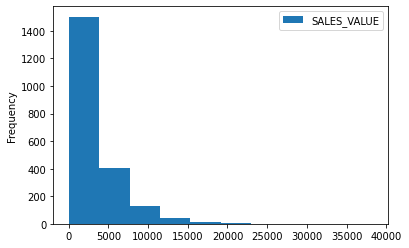

In [30]:
#Plot the distribution of total sales value purchased at the household level.
transactions.groupby("household_key").agg({'SALES_VALUE':'sum'}).plot.hist()

In [31]:
# store top 10 households by total value and quantity
top10_value = (transactions.groupby("household_key").agg({'SALES_VALUE': 'sum'})
 .sort_values("SALES_VALUE", ascending=False).iloc[:10])

top10_quant = (transactions.groupby("household_key").agg({"QUANTITY": "sum"})
 .sort_values("QUANTITY", ascending=False).iloc[:10])

In [32]:
top10_value

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


In [33]:
top10_quant

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


In [34]:
# we can use multiple aggregation to create both in a single table an option
# this here is just to use to compare to chart

(transactions.groupby("household_key").agg({'SALES_VALUE': 'sum','QUANTITY': 'sum'})
 .sort_values("SALES_VALUE", ascending=False).loc[:, "SALES_VALUE"].describe()
)

count     2099.000000
mean      3175.914007
std       3287.043772
min          8.170000
25%        971.035000
50%       2145.710000
75%       4295.395000
max      38319.790000
Name: SALES_VALUE, dtype: float64

<AxesSubplot:xlabel='household_key'>

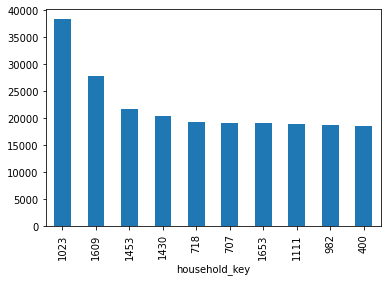

In [35]:
# top 10 households by sales value plotted with a bar plot

top10_value["SALES_VALUE"].plot.bar()

### Product Analysis
* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top selling items have a higher than average discount rate?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* What was the name most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the product name of the item that had the highest quantity sold in a single row.

In [36]:
# Create top 10 products by sales df
# group by PRODUCT_ID and sum sales value by product
# Sort in descending order and grab top 10 rows

top10_products = (transactions
                 .groupby(["PRODUCT_ID"])
                 .agg({"SALES_VALUE": "sum"})
                 .sort_values("SALES_VALUE", ascending=False)
                 .iloc[:10]
)

<AxesSubplot:ylabel='PRODUCT_ID'>

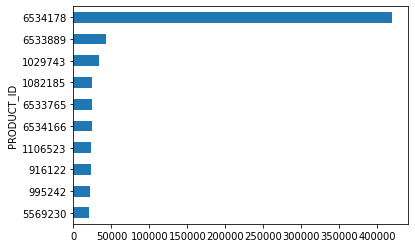

In [37]:
# plot top 10 products by sale value

top10_products["SALES_VALUE"].sort_values().plot.barh()

In [38]:
# Calculate the total discount for top 10 products
# Divide that by sales value for top 10 products

((transactions
 .query("PRODUCT_ID in @top10_products.index")
 .loc[: ,"total_discount"]
 .sum()) 
/(transactions
 .query("PRODUCT_ID in @top10_products.index")
 .loc[: ,"SALES_VALUE"]
  .sum())
)

0.10331343713193793

In [39]:
# read in products data

products = pd.read_csv("data/product.csv")

products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [40]:
# Look up top 10 products for households in top10_value table
# Use query to reference index of top10_value to filter to relevant households
# Use value counts to get counts by product_id (this will be order in descending order)
# Then grab the top 10 products with iloc and extract the index to get product numbers

top_hh_products = (transactions
                   .query("household_key in @top10_value.index")
                   .loc[:, "PRODUCT_ID"]
                   .value_counts()
                   .iloc[:10]
                   .index)

In [41]:
# Filter product table to products from prior cell
products.query("PRODUCT_ID in @top_hh_products")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
10630,860776,2,PRODUCE,National,VEGETABLES - ALL OTHERS,CUCUMBERS,36 CT
20973,951590,910,GROCERY,National,BAKED BREAD/BUNS/ROLLS,MAINSTREAM WHITE BREAD,20 OZ
24250,981760,69,GROCERY,Private,EGGS,EGGS - X-LARGE,1 DZ
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
40600,1127831,5937,PRODUCE,National,BERRIES,STRAWBERRIES,16 OZ
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
68952,9677202,69,GROCERY,Private,PAPER TOWELS,PAPER TOWELS & HOLDERS,


In [42]:
# Product with highest quantity in a single row

products.query("PRODUCT_ID == 6534178")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [43]:
# Look up 10 product names for all customers (from first cell)

products.query("PRODUCT_ID in @top10_products.index")

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
16863,916122,4314,MEAT,National,CHICKEN,CHICKEN BREAST BONELESS,
25754,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,
29657,1029743,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
35576,1082185,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
38262,1106523,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA
53097,5569230,1208,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
57171,6533765,69,KIOSK-GAS,Private,FUEL,GASOLINE-REG UNLEADED,
57181,6533889,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57216,6534166,69,MISC SALES TRAN,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,
57221,6534178,69,KIOSK-GAS,Private,COUPON/MISC ITEMS,GASOLINE-REG UNLEADED,


In [45]:
# Use the following snippet to create a Date Column then drop. Then drop the `Day` and `Week_no` columns.

transactions = (transactions
                .assign(date = 
                        (pd.to_datetime("2016", format='%Y') 
                        + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + " days"))
                       )
                .drop(["DAY"], axis=1)
               )


In [47]:
transactions.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,discount_pct,date
0,1364,26984896261,842930,1,2.19,31742,1,0.00,0.000000,2016-01-01
1,1364,26984896261,897044,1,2.99,31742,1,0.40,0.133779,2016-01-01
2,1364,26984896261,920955,1,3.09,31742,1,0.00,0.000000,2016-01-01
3,1364,26984896261,937406,1,2.50,31742,1,0.99,0.396000,2016-01-01
4,1364,26984896261,981760,1,0.60,31742,1,0.79,1.000000,2016-01-01


### TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Plot the same series after filtering down to dates April 2016 and October 2017.
* Plot the sum of sales 2016 vs the 2017 sales.
* Plot total sales by day of week.

<AxesSubplot:xlabel='date'>

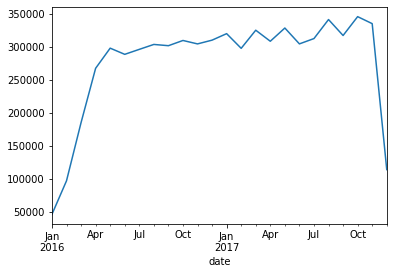

In [48]:
# Set a date index, graby the sales column, and calculate a monthly sum using resampling.
# Then build the default line plot

(transactions.set_index("date")
 .loc[:, "SALES_VALUE"]
 .resample("M")
 .sum()
 .plot())

<AxesSubplot:xlabel='date'>

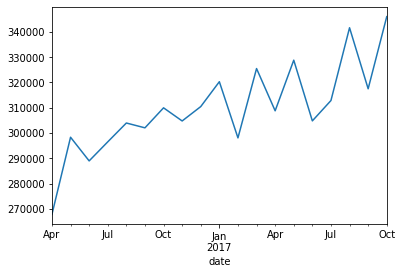

In [49]:
# Filter above plot to specified date range with row slice in .loc
(transactions
 .set_index("date")
 .loc["2016-04":"2017-10", "SALES_VALUE"]
 .resample("M")
 .sum()
 .plot())

<AxesSubplot:xlabel='date'>

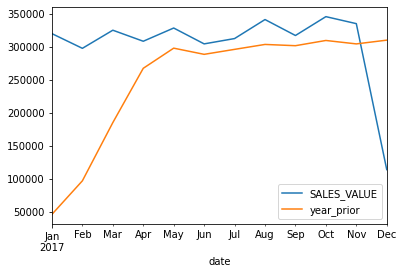

In [50]:
# After resampling monthly sales, create a year_prior column with assign
# This column is our monthly sales shifted forward a year (12 rows/months)

(transactions
 .set_index("date")
 .loc[:, ["SALES_VALUE"]]
 .resample("M")
 .sum()
 .assign(year_prior = lambda x: x["SALES_VALUE"].shift(12))
 .loc["2017"]
 .plot())

<AxesSubplot:xlabel='date'>

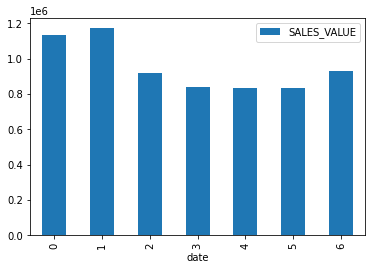

In [51]:
# Group transactions by dayofweek, then calculate sum and plot a bar chart
(transactions
 .groupby(transactions["date"].dt.dayofweek)
 .agg({"SALES_VALUE": "sum"})
 .plot.bar()
)

### DEMOGRAPHICS

* Read in the `hh_demographic.csv` file.


* Group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Join the demographics DataFrame to the transactions table. Since we're interested in analyzing the demographic data we have.

* Plot the sum of sales by age_desc and income_desc.


* Create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`.

In [53]:
# Specify columns to include 
dem_cols = ["AGE_DESC", "INCOME_DESC", "household_key", "HH_COMP_DESC"]

# Convert the object columns here to category dtype
dem_dtypes = {"AGE_DESC": "category", "INCOME_DESC": "category", "HH_COMP_DESC":"category"}

demographics = pd.read_csv('data/hh_demographic.csv',
                          usecols=dem_cols,
                          dtype=dem_dtypes
                          )

In [54]:
demographics.head()

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16


In [55]:
demographics.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       801 non-null    category
 1   INCOME_DESC    801 non-null    category
 2   HH_COMP_DESC   801 non-null    category
 3   household_key  801 non-null    int64   
dtypes: category(3), int64(1)
memory usage: 10.9 KB


In [56]:
# Create total sales by household dataframe

household_sales = (transactions
                   .groupby("household_key")
                   .agg({"SALES_VALUE": "sum"})
                  )

household_sales

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


In [57]:
# Join household sales and demographics table on household_key (inner since we're interested in both sets)

household_sales_demo = (household_sales.merge(demographics, 
                             how="inner",
                             left_on='household_key',
                             right_on="household_key",
                             )
                       )

In [58]:
household_sales_demo.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 667
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   household_key  668 non-null    int64   
 1   SALES_VALUE    668 non-null    float64 
 2   AGE_DESC       668 non-null    category
 3   INCOME_DESC    668 non-null    category
 4   HH_COMP_DESC   668 non-null    category
dtypes: category(3), float64(1), int64(1)
memory usage: 19.8 KB


<AxesSubplot:xlabel='AGE_DESC'>

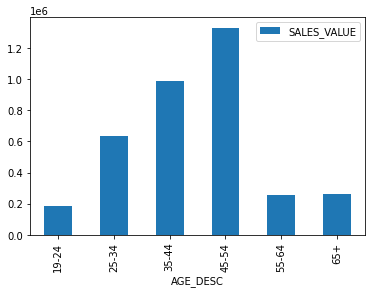

In [59]:
# Calculate sum of sales by age group

(household_sales_demo
.groupby(["AGE_DESC"])
.agg({"SALES_VALUE": "sum"})
.plot.bar()
)

<AxesSubplot:xlabel='INCOME_DESC'>

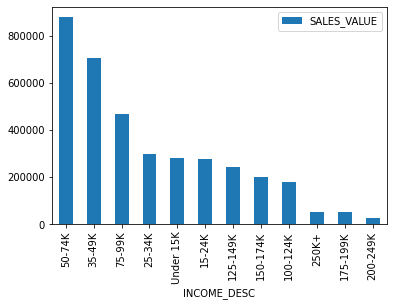

In [60]:
# Calculate sum of sales by income, ordered by magnitude

(household_sales_demo.groupby(["INCOME_DESC"])
.agg({"SALES_VALUE": "sum"})
.sort_values("SALES_VALUE", ascending=False)
.plot.bar())

In [61]:
# Calculate mean household spend by Age Description and HH Composition
# Format with a heatmap across all cells

(household_sales_demo.pivot_table(index="AGE_DESC", 
                 columns="HH_COMP_DESC",
                 values="SALES_VALUE",
                 aggfunc="mean",
                 margins=True)
 .style.background_gradient(cmap="RdYlGn", axis=None)
)

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000,4692.077692
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000,5435.517521
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818,6090.556728
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682,5534.879958
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000,5168.924200
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000,4340.936500
All,6032.802143,6280.069103,5599.857756,4895.928361,4544.646750,4936.127778,5468.398743


# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales.

In [63]:
# specify columns to use
product_cols = ["PRODUCT_ID", "DEPARTMENT"]

# specify datatypes for each column
product_dtypes = {"PRODUCT_ID": "Int32", "DEPARTMENT": "category"}

product = pd.read_csv('data/product.csv',
                     usecols=product_cols,
                     dtype=product_dtypes)

In [64]:
product.dtypes

PRODUCT_ID       Int32
DEPARTMENT    category
dtype: object

In [65]:
# Join all three tables together with an inner join
# Join product on product_id (only shared column)
trans_demo_dept = (transactions
                  .merge(demographics, 
                         how="inner",
                         left_on='household_key',
                         right_on="household_key",)
                  .merge(product,
                         how="inner",
                         left_on="PRODUCT_ID",
                         right_on="PRODUCT_ID")
             
             )

In [66]:
# much smaller than our original, uncoverted transactions df!
trans_demo_dept.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161575 entries, 0 to 1161574
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   household_key   1161575 non-null  int32         
 1   BASKET_ID       1161575 non-null  int64         
 2   PRODUCT_ID      1161575 non-null  int32         
 3   QUANTITY        1161575 non-null  int32         
 4   SALES_VALUE     1161575 non-null  float64       
 5   STORE_ID        1161575 non-null  int32         
 6   WEEK_NO         1161575 non-null  int8          
 7   total_discount  1161575 non-null  float64       
 8   discount_pct    1161575 non-null  float64       
 9   date            1161575 non-null  datetime64[ns]
 10  AGE_DESC        1161575 non-null  category      
 11  INCOME_DESC     1161575 non-null  category      
 12  HH_COMP_DESC    1161575 non-null  category      
 13  DEPARTMENT      1161575 non-null  category      
dtypes: category(4), da

In [67]:
# Where does our youngest demographic rank near the top in sales?

(trans_demo_dept.pivot_table(index="DEPARTMENT",
                            columns="AGE_DESC",
                            values="SALES_VALUE",
                            aggfunc="sum")
 .style.background_gradient(cmap="RdYlGn", axis=1))

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AUTOMOTIVE,11.640000,21.250000,72.580000,55.920000,0.000000,16.370000
CHARITABLE CONT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CHEF SHOPPE,81.300000,134.160000,348.530000,418.240000,80.860000,149.240000
CNTRL/STORE SUP,2.000000,0.000000,1.000000,9.950000,2.000000,0.100000
COSMETICS,698.630000,2273.030000,4362.020000,5187.570000,986.260000,600.900000
COUP/STR & MFG,7.490000,48.420000,121.200000,154.550000,40.680000,20.490000
DAIRY DELI,3.800000,3.850000,7.390000,16.750000,3.140000,1.940000
DELI,4043.300000,18181.940000,34577.290000,44334.220000,9850.540000,10462.330000


# EXPORT

Export your pivot table to an excel file.

In [68]:
# Call to_excel on pivot table above - note the formatting gets passed to excel too!

(trans_demo_dept.pivot_table(index="DEPARTMENT",
                            columns="AGE_DESC",
                            values="SALES_VALUE",
                            aggfunc="sum")
 .style.background_gradient(cmap="RdYlGn", axis=1)
 .to_excel("demographic_category_sales.xlsx", sheet_name="sales_pivot")
)